In [86]:
# Initial imports
import pandas as pd
from pathlib import Path

In [87]:
# Data loading
file_path = Path("Instructions/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [88]:
# List dataframe data types
df_myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [89]:
# Remove the MYOPIC Column
labels = df_myopia['MYOPIC']
df_myopia.drop('MYOPIC', axis=1, inplace=True)

In [42]:
# Find null values
for column in df_myopia.columns:
    print(f"Column {column} has {df_myopia[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [52]:
# Find duplicate entries
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")

Duplicate entries: 0


In [55]:
#In order to use unsupervised learning algorithms, all the features should be numeric, and also, on similar scales.
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia[['SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR',
                                               'DIOPTERHR', 'MOMMY', 'DADMY' ]])

In [56]:
# A list of the columns from the original DataFrame
df_myopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [57]:
# Create a DataFrame with the transformed data
new_df_myopia = pd.DataFrame(scaled_data, columns=df_myopia.columns[1:])
new_df_myopia['AGE'] = df_myopia['AGE']
new_df_myopia.head()

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,AGE
0,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241,6
1,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241,6
2,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769,6
3,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241,6
4,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769,5


In [58]:
# Saving cleaned data
file_path = Path("Instructions/Myopia_data_cleaned.csv")
new_df_myopia.to_csv(file_path, index=False)


In [62]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [63]:
file_path = Path("Instructions/Myopia_data_cleaned.csv")
df_iris = pd.read_csv(file_path)
df_iris.head()

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,AGE
0,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241,6
1,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241,6
2,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769,6
3,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241,6
4,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769,5


In [64]:
# Standarize data with StandarScaler
iris_scaled = StandardScaler().fit_transform(df_iris)
print(iris_scaled[0:5])


[[-1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916   4.1506609
   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393  0.98713773
   1.0032415  -0.42021911]
 [-0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253 -0.99889822
  -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755  0.98713773
   1.0032415  -0.42021911]
 [ 0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879  0.25709181
  -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378 -1.01302987
  -0.99676897 -0.42021911]
 [-0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715  0.75948782
   2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458 -1.01302987
   1.0032415  -0.42021911]
 [-0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813  0.25709181
  -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264  0.98713773
  -0.99676897 -1.82397807]]


In [68]:
# Applying PCA to reduce dimensions from 6 to 2

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
iris_M_pca = pca.fit_transform(iris_scaled)
iris_M_pca.shape

(618, 10)

In [72]:
# Transform PCA data to a DataFrame. Principal component=PC.
df_iris_M_pca = pd.DataFrame(
    data=iris_M_pca, columns=["PC 1", "PC 2", "PC3","PC4", "PC5", 
                              "PC6",
                             "PC7", "PC8", "PC9", "PC10"]
)
df_iris_M_pca.head()

,PC 1,PC 2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [74]:
from sklearn.manifold import TSNE

In [77]:
# Initialize t-SNE model

tsne = TSNE(learning_rate=600)
tsne_features = tsne.fit_transform(df_iris_M_pca)
tsne_features.shape

C:\Users\M\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

In [79]:
# Prepare to plot the dataset

# The first column of transformed features
df_iris_M_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_iris_M_pca['y'] = tsne_features[:,1]

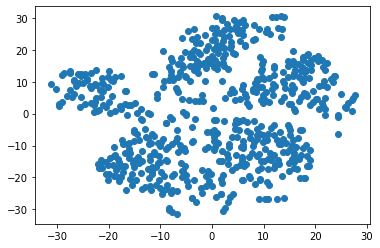

In [80]:
# Visualize the clusters
plt.scatter(df_iris_M_pca['x'], df_iris_M_pca['y'])
plt.show()

In [92]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

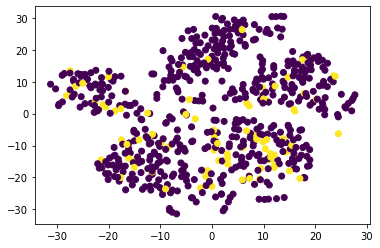

In [91]:
# Visualize the clusters with color
plt.scatter(df_iris_M_pca['x'], df_iris_M_pca['y'], c=labels)
plt.show()

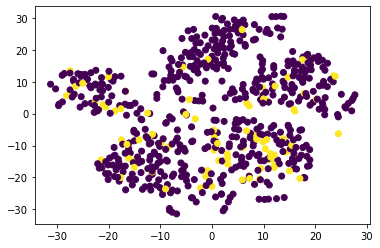

In [90]:
#Create a scatter plot of the t-SNE output. 
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

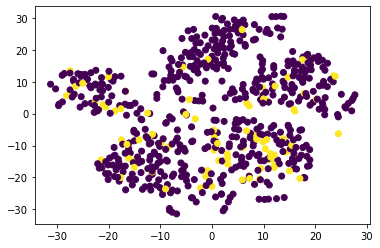

In [90]:
#Create a scatter plot of the t-SNE output. 
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

In [ ]:
#Perform a Cluster Analysis with K-means

C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

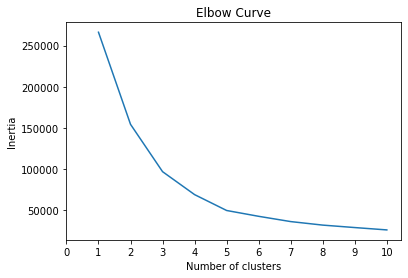

In [94]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_iris_M_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Because the inertia  drops  around 5 clusters, as show in the Elbow Curve, patients can be clustered into 5 groups.


In [101]:
# Predicting clusters with k=5

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_iris_M_pca)

# Predict clusters
predictions = model.predict(df_iris_M_pca)

# Add the predicted class column to the dataframe
df_iris_M_pca["class"] = model.labels_
df_iris_M_pca.head()

C:\Users\M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,PC 1,PC 2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-0.865074,-17.829847,2
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,9.804498,-6.672175,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-2.288569,22.215214,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,16.059731,0.804547,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-11.208331,-6.919182,0


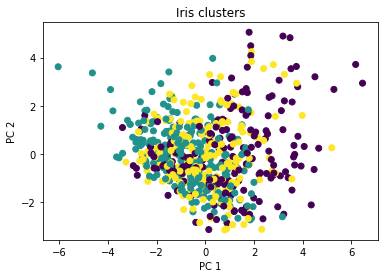

In [102]:
# Visualize the clusters
plt.scatter(x=df_iris_M_pca['PC 1'], y=df_iris_M_pca['PC 2'], c=df_iris_M_pca['class'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Iris clusters')
plt.show()